Meilleurs paramètres: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Meilleur score (validation): 0.8404

=== Performance du modèle KNN ===
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85        73
         1.0       0.84      0.87      0.85        70

    accuracy                           0.85       143
   macro avg       0.85      0.85      0.85       143
weighted avg       0.85      0.85      0.85       143

Accuracy: 0.8531


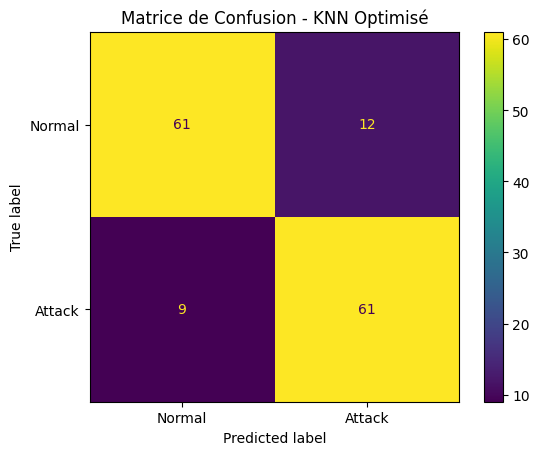

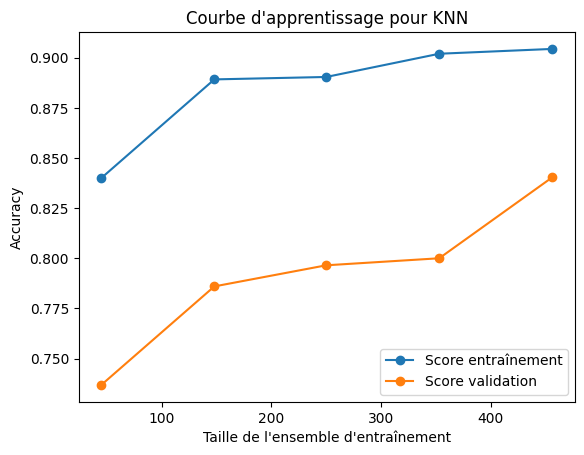

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier  # Import manquant ajouté ici
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# 1. Chargement et inspection des données
df = pd.read_csv('missions_fusionnees.csv')

# 3. Préparation des features
time_cols = [col for col in df.columns if col.startswith('time_')]
features = df.drop(['mission_id', 'is_attack','erreur_m'] + time_cols, axis=1, errors='ignore')
features = features.apply(pd.to_numeric, errors='coerce')

# 4. Gestion des valeurs manquantes
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# 5. Split des données
X_train, X_test, y_train, y_test = train_test_split(
    features_imputed, 
    df['is_attack'], 
    test_size=0.2, 
    random_state=41,
    stratify=df['is_attack']
)

# 6. Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Optimisation du KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# 8. Meilleur modèle
best_knn = grid.best_estimator_
print(f"Meilleurs paramètres: {grid.best_params_}")
print(f"Meilleur score (validation): {grid.best_score_:.4f}")

# 9. Évaluation
y_pred = best_knn.predict(X_test_scaled)
print("\n=== Performance du modèle KNN ===")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# 10. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Attack'])
disp.plot()
plt.title("Matrice de Confusion - KNN Optimisé")
plt.show()

# 11. Courbe d'apprentissage (optionnel)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_knn, X_train_scaled, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy')

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Score entraînement")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Score validation")
plt.title("Courbe d'apprentissage pour KNN")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [6]:
import joblib

joblib.dump({
    'model': best_knn,
    'scaler': scaler
}, 'knn_model.pkl')

print("Modèle KNN et scaler sauvegardés dans 'knn_model.pkl'")


Modèle KNN et scaler sauvegardés dans 'knn_model.pkl'


In [7]:
"""
# Chargement du modèle et du scaler
data = joblib.load('knn_model.pkl')
knn_loaded = data['model']
scaler_loaded = data['scaler']

# Exemple d'utilisation
X_new_scaled = scaler_loaded.transform(X_test)  # ou tout autre jeu de données
y_pred_loaded = knn_loaded.predict(X_new_scaled)
"""

"\n# Chargement du modèle et du scaler\ndata = joblib.load('knn_model.pkl')\nknn_loaded = data['model']\nscaler_loaded = data['scaler']\n\n# Exemple d'utilisation\nX_new_scaled = scaler_loaded.transform(X_test)  # ou tout autre jeu de données\ny_pred_loaded = knn_loaded.predict(X_new_scaled)\n"